In [3]:
import numpy as np
from scipy.io import wavfile
import IPython.display as ipd
import time
from scipy import signal

sr, IN = wavfile.read('female.wav')
IN = IN/abs(max(IN))
IN=IN[:22050]
ipd.Audio(IN, rate=sr)

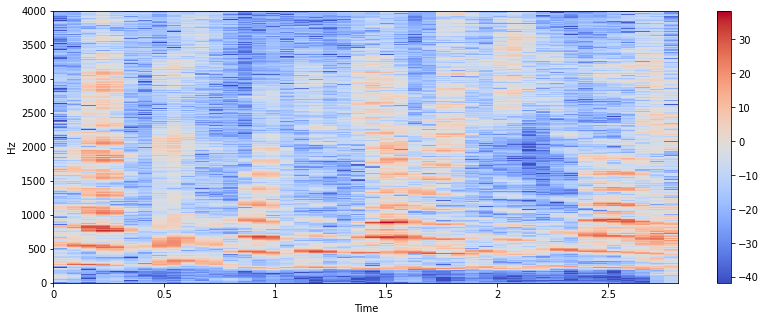

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
X = librosa.stft(IN)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

In [9]:
sos = signal.butter(4, [165, 255], 'bandpass', output = 'sos', fs = sr)
IN_bandpassed = signal.sosfilt(sos, IN)

# частота женского голоса: 160 - 500 Гц (165 - 255 Гц??)
#def bandpass(x, CF, BW):
    #я не знаю как это сделать
    
ipd.Audio(IN_bandpassed, rate=sr)

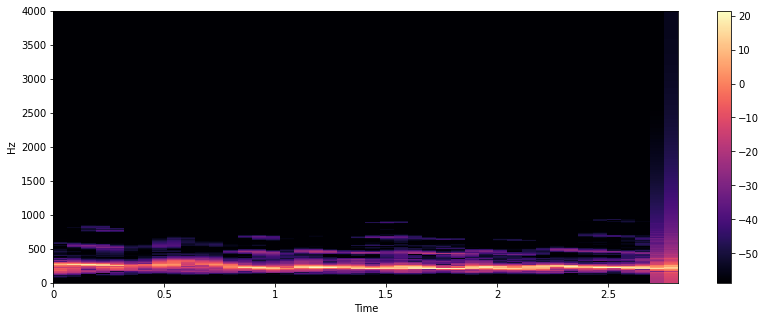

In [10]:
X = librosa.stft(IN_bandpassed)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

In [19]:
def window(x):
    return (1 + np.cos(2*np.pi*x))/2 

def pitchShift(IN, IN_bandpassed, periodratio):
    OUT = np.zeros(len(IN))
    inptr = 0
    oldzero = 0
    x = IN_bandpassed[0]
    outptr = 0
    flag = 0
    for inptr in range(1,len(IN)):
        oldx = x
        x = IN_bandpassed[inptr]
        if oldx > 0 and x < 0:
            period = inptr - oldzero
            oldzero = inptr
            if flag == 0:
                flag = 1
        while outptr < inptr and flag == 1 and period*periodratio >= 1:
            outptr += int(period*periodratio)
            for n in range(0, period):
                if n+outptr < len(OUT) and n+inptr < len(IN):
                    OUT[n + outptr] += IN[n + inptr]*window(n/period)
        oldx = x
    return OUT
                    
periodratio = 0.5
t1 = time.time()
OUT = pitchShift(IN, IN_bandpassed, periodratio)
t2 = time.time()
print(str(t2-t1) + " seconds")
                    
ipd.Audio(OUT, rate=sr)

0.31201887130737305 seconds


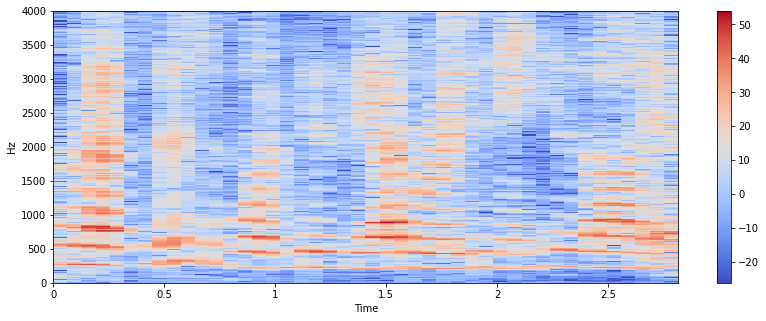

In [16]:
X = librosa.stft(OUT)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()